# Proyecto #1 - Inteligencia de Negocios

## Integrantes:

### Santiago Cabra Chavez - 202110929 - s.cabrac@uniandes.edu.co
### Andres Cardenas Layton - 202122083 - a.cardenasl@uniandes.edu.co
### Tatiana Vera Hernandez - 202113341 - k.verah@uniandes.edu.co

# Etapa #1 -  Documentación del proceso de aprendizaje automático. 

# Etapa #2 - Entendimiento y preparación de los datos.

Dataset cargado: (2424, 2)
Columnas: ['textos', 'labels']

Primeras filas:
                                              textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

Total de textos: 2424
Clases únicas: [4 3 1]
Distribución de clases:
labels
4    1025
3     894
1     505
Name: count, dtype: int64

ANÁLISIS DE CALIDAD DE DATOS

1. VALORES FALTANTES:
Textos faltantes: 0 (0.0%)
Labels faltantes: 0 (0.0%)

2. DUPLICADOS:
Filas completamente duplicadas: 0
Textos duplicados: 0 (0.0%)
Textos vacíos o solo espacios: 0

3. ESTADÍSTICAS DE LONGITUD:
Longitud promedio (caracteres): 683.2
Longitud promedio (palabras): 107.9
Texto más corto: 303 caracteres
Texto más largo: 1492 caracteres
Textos muy cortos (< 3 palabras): 0 (0.

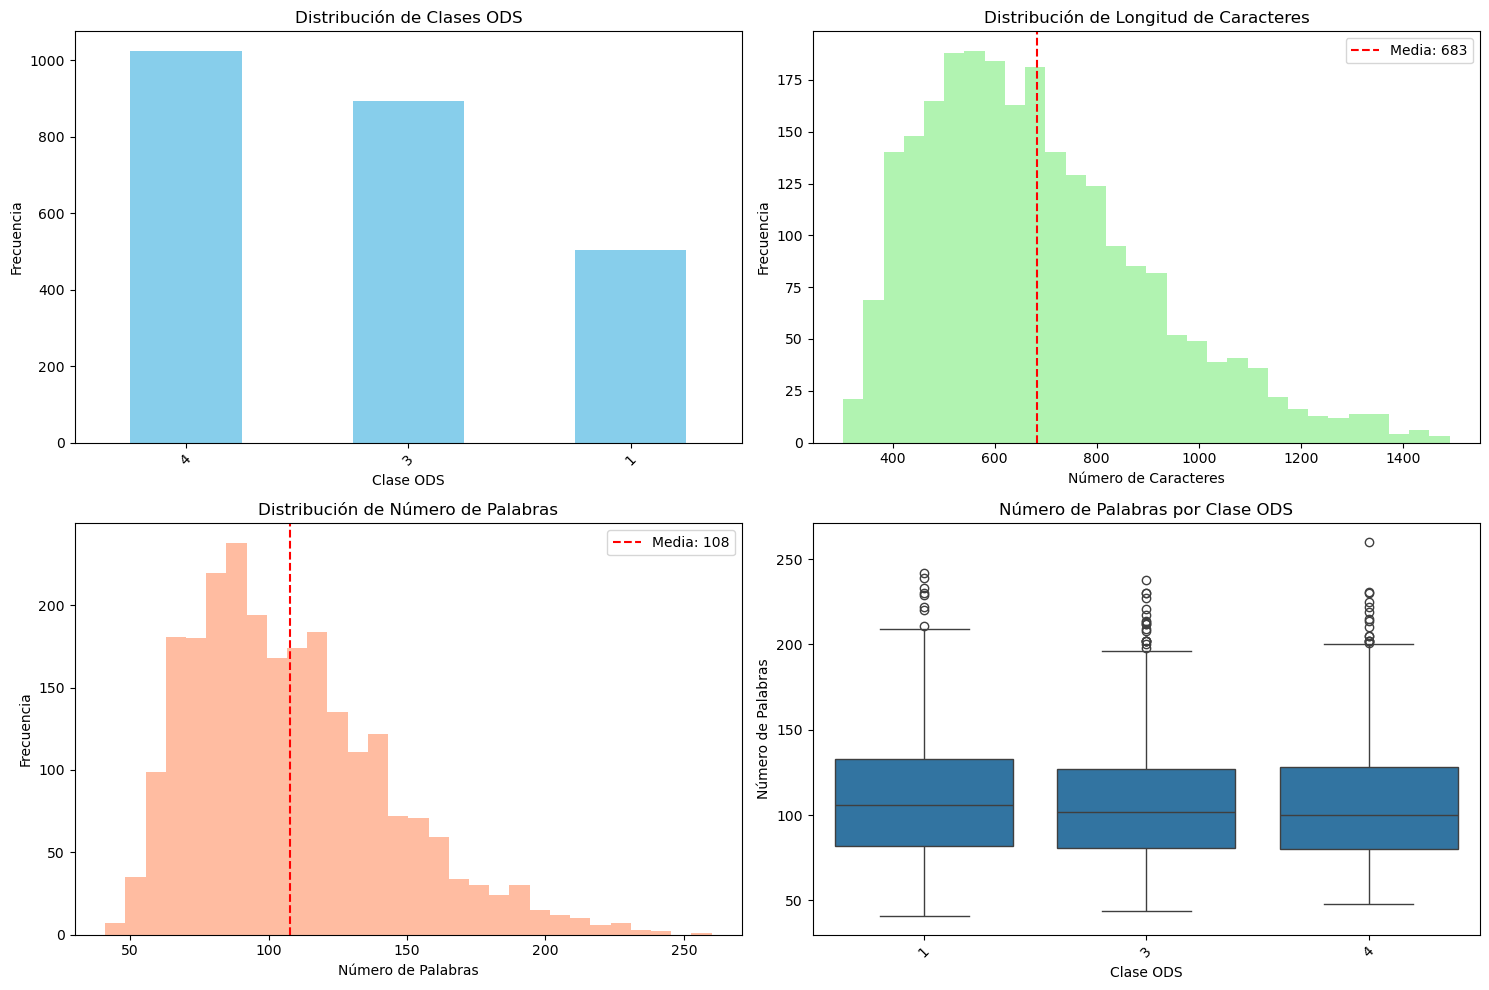


Preprocesamiento completado
Ejemplo de texto original: "Aprendizaje" y "educación" se consideran sinónimos de escolarización formal. Las organizaciones aux...
Ejemplo de texto limpio: aprendizaje y educación se consideran sinónimos de escolarización formal las organizaciones auxiliar...

LIMPIEZA DE DATOS
Dataset original: 2424 registros
Dataset limpio: 2424 registros
Registros eliminados: 0 (0.0%)

Nueva distribución de clases:
Clase 4: 1025 registros (42.3%)
Clase 3: 894 registros (36.9%)
Clase 1: 505 registros (20.8%)

ANÁLISIS DE CONTENIDO

Palabras más comunes (top 15):
los: 8551
que: 5043
las: 4651
para: 3491
del: 2754
por: 2237
con: 2151

Palabras más comunes por clase ODS:

Clase 1:
  los: 1714

Clase 3:
  los: 2985

Clase 4:
  los: 3852

RESUMEN DEL ANÁLISIS
DATASET FINAL PREPARADO:
Total de registros: 2,424
Número de clases: 3
Longitud promedio de texto: 660.3 caracteres
Número promedio de palabras: 105.4

PROBLEMAS IDENTIFICADOS Y SOLUCIONADOS:

ESTADO DEL BALANCE DE CLASES

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# CARGA Y CONFIGURACIÓN INICIAL
# ==========================================


# Descargar stopwords 
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Cargar stopwords en español
stop_words_spanish = stopwords.words("spanish")

# Cargar dataset
df = pd.read_excel("C:/Users/lec12/Desktop/INTELIGENCIA DE NEGOCIOS/PROYECTO/Datos_proyecto.xlsx")  
print(f"Dataset cargado: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")
print("\nPrimeras filas:")
print(df.head())

# Variables de entrada y salida
X = df["textos"]
y = df["labels"]

print(f"\nTotal de textos: {len(X)}")
print(f"Clases únicas: {y.unique()}")
print(f"Distribución de clases:")
print(y.value_counts())

# ==========================================
# ANÁLISIS DE CALIDAD DE DATOS
# ==========================================

print("\n" + "="*50)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("="*50)

# 1. Análisis de valores faltantes
print("\n1. VALORES FALTANTES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
print(f"Textos faltantes: {missing_data['textos']} ({missing_percent['textos']:.1f}%)")
print(f"Labels faltantes: {missing_data['labels']} ({missing_percent['labels']:.1f}%)")

# 2. Análisis de duplicados
print("\n2. DUPLICADOS:")
total_duplicates = df.duplicated().sum()
text_duplicates = df['textos'].duplicated().sum()
print(f"Filas completamente duplicadas: {total_duplicates}")
print(f"Textos duplicados: {text_duplicates} ({text_duplicates/len(df)*100:.1f}%)")

# 3. Análisis de textos vacíos
empty_texts = df['textos'].isna() | (df['textos'].str.strip() == '')
print(f"Textos vacíos o solo espacios: {empty_texts.sum()}")

# 4. Estadísticas de longitud de texto
print("\n3. ESTADÍSTICAS DE LONGITUD:")
char_lengths = df['textos'].astype(str).str.len()
word_lengths = df['textos'].astype(str).str.split().str.len()

print(f"Longitud promedio (caracteres): {char_lengths.mean():.1f}")
print(f"Longitud promedio (palabras): {word_lengths.mean():.1f}")
print(f"Texto más corto: {char_lengths.min()} caracteres")
print(f"Texto más largo: {char_lengths.max()} caracteres")

# Textos muy cortos
very_short = word_lengths < 3
print(f"Textos muy cortos (< 3 palabras): {very_short.sum()} ({very_short.sum()/len(df)*100:.1f}%)")

# ==========================================
# ANÁLISIS DE DISTRIBUCIÓN DE CLASES
# ==========================================

print("\n4. ANÁLISIS DE BALANCE DE CLASES:")
label_counts = y.value_counts()
label_percent = (label_counts / len(y)) * 100

# Mostrar distribución
for label, count in label_counts.items():
    percentage = label_percent[label]
    print(f"Clase {label}: {count} registros ({percentage:.1f}%)")

# Evaluar balance
max_percent = label_percent.max()
min_percent = label_percent.min()
balance_ratio = max_percent / min_percent

print(f"\nRatio de desbalance: {balance_ratio:.2f}:1")

if balance_ratio <= 2:
    balance_status = "Balanceado"
elif balance_ratio <= 4:
    balance_status = "Moderadamente desbalanceado"
else:
    balance_status = "Altamente desbalanceado"

print(f"Estado: {balance_status}")

# ==========================================
# VISUALIZACIONES
# ==========================================

# Configurar visualizaciones
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución de clases
label_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribución de Clases ODS')
ax1.set_xlabel('Clase ODS')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)

# 2. Distribución de longitud de caracteres
ax2.hist(char_lengths, bins=30, alpha=0.7, color='lightgreen')
ax2.axvline(char_lengths.mean(), color='red', linestyle='--', label=f'Media: {char_lengths.mean():.0f}')
ax2.set_title('Distribución de Longitud de Caracteres')
ax2.set_xlabel('Número de Caracteres')
ax2.set_ylabel('Frecuencia')
ax2.legend()

# 3. Distribución de número de palabras
ax3.hist(word_lengths, bins=30, alpha=0.7, color='lightsalmon')
ax3.axvline(word_lengths.mean(), color='red', linestyle='--', label=f'Media: {word_lengths.mean():.0f}')
ax3.set_title('Distribución de Número de Palabras')
ax3.set_xlabel('Número de Palabras')
ax3.set_ylabel('Frecuencia')
ax3.legend()

# 4. Longitud por clase
df_viz = df.copy()
df_viz['word_count'] = word_lengths
sns.boxplot(data=df_viz, x='labels', y='word_count', ax=ax4)
ax4.set_title('Número de Palabras por Clase ODS')
ax4.set_xlabel('Clase ODS')
ax4.set_ylabel('Número de Palabras')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==========================================
# FUNCIÓN DE PREPROCESAMIENTO
# ==========================================

def preprocess_text(text):
    """Función para limpiar y preprocesar el texto"""
    if pd.isna(text):
        return ""
    # Convertir a minúsculas
    text = str(text).lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)
    # Eliminar espacios extra
    text = ' '.join(text.split())
    return text

# Preprocesar los textos
X_clean = X.apply(preprocess_text)

print("\nPreprocesamiento completado")
print(f"Ejemplo de texto original: {X.iloc[0][:100]}...")
print(f"Ejemplo de texto limpio: {X_clean.iloc[0][:100]}...")

# ==========================================
# LIMPIEZA DE DATOS
# ==========================================

print("\n" + "="*50)
print("LIMPIEZA DE DATOS")
print("="*50)

# Crear copia para limpieza
df_clean = df.copy()
print(f"Dataset original: {df_clean.shape[0]} registros")

# 1. Eliminar filas con textos vacíos
if empty_texts.sum() > 0:
    df_clean = df_clean[~empty_texts]
    print(f"Eliminados {empty_texts.sum()} textos vacíos")

# 2. Eliminar duplicados
if text_duplicates > 0:
    initial_count = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['textos'], keep='first')
    removed = initial_count - len(df_clean)
    print(f"Eliminados {removed} textos duplicados")

# 3. Eliminar textos muy cortos
df_clean['word_count'] = df_clean['textos'].astype(str).str.split().str.len()
short_texts = df_clean['word_count'] < 3
if short_texts.sum() > 0:
    df_clean = df_clean[~short_texts]
    print(f"Eliminados {short_texts.sum()} textos muy cortos")

print(f"Dataset limpio: {df_clean.shape[0]} registros")
print(f"Registros eliminados: {df.shape[0] - df_clean.shape[0]} ({((df.shape[0] - df_clean.shape[0])/df.shape[0]*100):.1f}%)")

# Verificar nueva distribución
print(f"\nNueva distribución de clases:")
new_distribution = df_clean['labels'].value_counts()
for label, count in new_distribution.items():
    percentage = (count / len(df_clean)) * 100
    print(f"Clase {label}: {count} registros ({percentage:.1f}%)")

# ==========================================
# ANÁLISIS DE CONTENIDO TEXTUAL
# ==========================================

print("\n" + "="*50)
print("ANÁLISIS DE CONTENIDO")
print("="*50)

# Aplicar preprocesamiento al dataset limpio
df_clean['textos_clean'] = df_clean['textos'].apply(preprocess_text)

# Palabras más comunes en general
print("\nPalabras más comunes (top 15):")
all_words = ' '.join(df_clean['textos_clean']).split()
word_counts = Counter(all_words)
most_common = word_counts.most_common(15)

for word, count in most_common:
    if len(word) > 2:  # Filtrar palabras muy cortas
        print(f"{word}: {count}")

# Palabras más comunes por clase (top 5 por clase)
print(f"\nPalabras más comunes por clase ODS:")
for label in sorted(df_clean['labels'].unique()):
    class_texts = df_clean[df_clean['labels'] == label]['textos_clean']
    class_words = ' '.join(class_texts).split()
    class_word_counts = Counter(class_words)
    class_common = class_word_counts.most_common(5)
    
    print(f"\nClase {label}:")
    for word, count in class_common:
        if len(word) > 2:
            print(f"  {word}: {count}")

# ==========================================
# RESUMEN FINAL
# ==========================================

print("\n" + "="*50)
print("RESUMEN DEL ANÁLISIS")
print("="*50)

print(f"DATASET FINAL PREPARADO:")
print(f"Total de registros: {len(df_clean):,}")
print(f"Número de clases: {len(df_clean['labels'].unique())}")
print(f"Longitud promedio de texto: {df_clean['textos_clean'].str.len().mean():.1f} caracteres")
print(f"Número promedio de palabras: {df_clean['textos_clean'].str.split().str.len().mean():.1f}")

print(f"\nPROBLEMAS IDENTIFICADOS Y SOLUCIONADOS:")
if empty_texts.sum() > 0:
    print(f"- Textos vacíos eliminados: {empty_texts.sum()}")
if text_duplicates > 0:
    print(f"- Textos duplicados eliminados: {text_duplicates}")
if very_short.sum() > 0:
    print(f"- Textos muy cortos eliminados: {very_short.sum()}")

print(f"\nESTADO DEL BALANCE DE CLASES: {balance_status}")
print(f"Ratio de desbalance: {balance_ratio:.2f}:1")

if balance_ratio > 4:
    print("\nRECOMENDACIONES:")
    print("- Considerar técnicas de balanceo (SMOTE, class_weight)")
    print("- Usar stratified sampling en train/test split")

print(f"\nDATASET LISTO PARA:")
print("- Vectorización (TF-IDF, CountVectorizer)")
print("- Entrenamiento de modelos (k-NN, Random Forest, SVM)")
print("- Validación cruzada estratificada")

# Variables finales para usar en el modelado
X_final = df_clean['textos_clean']
y_final = df_clean['labels']

print(f"\nVariables preparadas:")
print(f"X_final: {len(X_final)} textos preprocesados")
print(f"y_final: {len(y_final)} etiquetas correspondientes")

# Etapa #3 - Modelado y Evaluacion.


DESCRIPCIÓN DE ALGORITMOS SELECCIONADOS:

1. k-NN (k-Nearest Neighbors):
   - Algoritmo de clasificación basado en proximidad
   - Clasifica según las k muestras más cercanas
   - Usa distancia coseno para datos textuales
   - Trabajado por: Santiago Cabra Chavez

2. Random Forest:
   - Conjunto de múltiples árboles de decisión
   - Reduce overfitting mediante bagging
   - Maneja bien la alta dimensionalidad de textos
   - Trabajado por:  Tatiana Vera

3. Support Vector Machine (SVM):
   - Encuentra el hiperplano óptimo de separación
   - Efectivo para espacios de alta dimensionalidad
   - Kernel lineal para datos textuales dispersos
   - Trabajado por: Andres Cardenas

DIVISION DE DATOS:
Datos de entrenamiento: (1939, 5000)
Datos de prueba: (485, 5000)

ESTRATEGIA 1: TF-IDF
Descripción: Term Frequency-Inverse Document Frequency
- Pondera la importancia de términos según su frecuencia relativa
- Reduce el peso de palabras muy comunes
- Incluye unigramas y bigramas para capturar contex

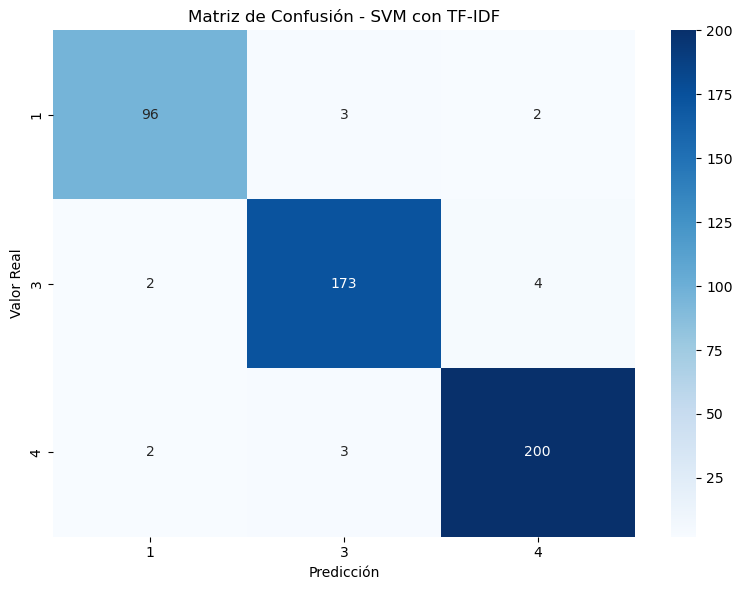


CONCLUSIÓN:
El modelo SVM con vectorización TF-IDF obtuvo el mejor
rendimiento con un accuracy de 0.9670, siendo la mejor
opción para la clasificación de textos en categorías ODS.


In [20]:

print("\nDESCRIPCIÓN DE ALGORITMOS SELECCIONADOS:")
print("\n1. k-NN (k-Nearest Neighbors):")
print("   - Algoritmo de clasificación basado en proximidad")
print("   - Clasifica según las k muestras más cercanas")
print("   - Usa distancia coseno para datos textuales")
print("   - Trabajado por: Santiago Cabra Chavez")

print("\n2. Random Forest:")
print("   - Conjunto de múltiples árboles de decisión")
print("   - Reduce overfitting mediante bagging")
print("   - Maneja bien la alta dimensionalidad de textos")
print("   - Trabajado por:  Tatiana Vera")

print("\n3. Support Vector Machine (SVM):")
print("   - Encuentra el hiperplano óptimo de separación")
print("   - Efectivo para espacios de alta dimensionalidad")
print("   - Kernel lineal para datos textuales dispersos")
print("   - Trabajado por: Andres Cardenas")



# ==========================================
# Division de datos
# ==========================================


print("\n" + "="*50)
print("DIVISION DE DATOS:")
print("="*50)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos de entrenamiento: {X_train_tfidf.shape}")
print(f"Datos de prueba: {X_test_tfidf.shape}")

# ==========================================
# Estrategia 1 - TF-IDF
# ==========================================
print("\n" + "="*50)
print("ESTRATEGIA 1: TF-IDF")
print("="*50)
print("Descripción: Term Frequency-Inverse Document Frequency")
print("- Pondera la importancia de términos según su frecuencia relativa")
print("- Reduce el peso de palabras muy comunes")
print("- Incluye unigramas y bigramas para capturar contexto")

vectorizer_tfidf = TfidfVectorizer(
    stop_words=stop_words_spanish, 
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

X_tfidf = vectorizer_tfidf.fit_transform(X_clean)
print(f"Forma de la matriz TF-IDF: {X_tfidf.shape}")

# ==========================================
# Estrategia 2 - Bag of Words
# ==========================================
print("\n" + "="*50)
print("ESTRATEGIA 2: BAG OF WORDS")
print("="*50)
print("Descripción: Representación binaria de presencia/ausencia")
print("- Ignora la frecuencia, solo considera presencia de términos")
print("- Más simple que TF-IDF pero efectiva para clasificación")
print("- Reduce el impacto de diferencias en longitud de documentos")

vectorizer_bow = CountVectorizer(
    stop_words=stop_words_spanish,
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    binary=True
)

X_bow = vectorizer_bow.fit_transform(X_clean)
print(f"Forma de la matriz BoW: {X_bow.shape}")

X_train_bow, X_test_bow, _, _ = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# Estrategia 3 - TF-IDF Extendida
# ==========================================
print("\n" + "="*50)
print("ESTRATEGIA 3: TF-IDF EXTENDIDA")
print("="*50)
print("Descripción: TF-IDF con trigramas y escalado sublinear")
print("- Incluye secuencias de hasta 3 palabras (trigramas)")
print("- Escalado sublinear para reducir impacto de términos muy frecuentes")
print("- Mayor vocabulario para capturar patrones complejos")

vectorizer_extended = TfidfVectorizer(
    stop_words=stop_words_spanish,
    max_features=8000,
    ngram_range=(1, 3),
    min_df=3,
    max_df=0.90,
    sublinear_tf=True
)

X_extended = vectorizer_extended.fit_transform(X_clean)
print(f"Forma de la matriz TF-IDF Extendida: {X_extended.shape}")

X_train_extended, X_test_extended, _, _ = train_test_split(
    X_extended, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# Modelo 1 - k-NN
# ==========================================
print("\n" + "="*50)
print("MODELO 1: k-NEAREST NEIGHBORS (k-NN)")
print("="*50)

results_knn = {}

# k-NN con TF-IDF
print("\n1. k-NN con TF-IDF:")
knn_tfidf = KNeighborsClassifier(n_neighbors=5, metric="cosine")
knn_tfidf.fit(X_train_tfidf, y_train)
y_pred_knn_tfidf = knn_tfidf.predict(X_test_tfidf)
acc_knn_tfidf = accuracy_score(y_test, y_pred_knn_tfidf)
print(f"Accuracy: {acc_knn_tfidf:.4f}")
print(classification_report(y_test, y_pred_knn_tfidf))
results_knn['TF-IDF'] = acc_knn_tfidf

# k-NN con Bag of Words
print("\n2. k-NN con Bag of Words:")
knn_bow = KNeighborsClassifier(n_neighbors=5, metric="cosine")
knn_bow.fit(X_train_bow, y_train)
y_pred_knn_bow = knn_bow.predict(X_test_bow)
acc_knn_bow = accuracy_score(y_test, y_pred_knn_bow)
print(f"Accuracy: {acc_knn_bow:.4f}")
print(classification_report(y_test, y_pred_knn_bow))
results_knn['BoW'] = acc_knn_bow

# k-NN con TF-IDF Extendida
print("\n3. k-NN con TF-IDF Extendida:")
knn_extended = KNeighborsClassifier(n_neighbors=5, metric="cosine")
knn_extended.fit(X_train_extended, y_train)
y_pred_knn_extended = knn_extended.predict(X_test_extended)
acc_knn_extended = accuracy_score(y_test, y_pred_knn_extended)
print(f"Accuracy: {acc_knn_extended:.4f}")
print(classification_report(y_test, y_pred_knn_extended))
results_knn['TF-IDF Ext'] = acc_knn_extended

print(f"\nRESUMEN k-NN:")
for strategy, acc in results_knn.items():
    print(f"{strategy}: {acc:.4f}")

# ==========================================
# Modelo 2 - Random Forest
# ==========================================
print("\n" + "="*50)
print("MODELO 2: RANDOM FOREST")
print("="*50)

results_rf = {}

# Random Forest con TF-IDF
print("\n1. Random Forest con TF-IDF:")
rf_tfidf = RandomForestClassifier(
    n_estimators=100, max_depth=20, min_samples_split=5,
    min_samples_leaf=2, random_state=42
)
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)
acc_rf_tfidf = accuracy_score(y_test, y_pred_rf_tfidf)
print(f"Accuracy: {acc_rf_tfidf:.4f}")
print(classification_report(y_test, y_pred_rf_tfidf))
results_rf['TF-IDF'] = acc_rf_tfidf

# Random Forest con Bag of Words
print("\n2. Random Forest con Bag of Words:")
rf_bow = RandomForestClassifier(
    n_estimators=100, max_depth=20, min_samples_split=5,
    min_samples_leaf=2, random_state=42
)
rf_bow.fit(X_train_bow, y_train)
y_pred_rf_bow = rf_bow.predict(X_test_bow)
acc_rf_bow = accuracy_score(y_test, y_pred_rf_bow)
print(f"Accuracy: {acc_rf_bow:.4f}")
print(classification_report(y_test, y_pred_rf_bow))
results_rf['BoW'] = acc_rf_bow

# Random Forest con TF-IDF Extendida
print("\n3. Random Forest con TF-IDF Extendida:")
rf_extended = RandomForestClassifier(
    n_estimators=100, max_depth=20, min_samples_split=5,
    min_samples_leaf=2, random_state=42
)
rf_extended.fit(X_train_extended, y_train)
y_pred_rf_extended = rf_extended.predict(X_test_extended)
acc_rf_extended = accuracy_score(y_test, y_pred_rf_extended)
print(f"Accuracy: {acc_rf_extended:.4f}")
print(classification_report(y_test, y_pred_rf_extended))
results_rf['TF-IDF Ext'] = acc_rf_extended

print(f"\nRESUMEN Random Forest:")
for strategy, acc in results_rf.items():
    print(f"{strategy}: {acc:.4f}")

# ==========================================
# Modelo 3 - SVM
# ==========================================
print("\n" + "="*50)
print("MODELO 3: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

results_svm = {}

# SVM con TF-IDF
print("\n1. SVM con TF-IDF:")
svm_tfidf = SVC(kernel='linear', C=1.0, random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)
acc_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
print(f"Accuracy: {acc_svm_tfidf:.4f}")
print(classification_report(y_test, y_pred_svm_tfidf))
results_svm['TF-IDF'] = acc_svm_tfidf

# SVM con Bag of Words
print("\n2. SVM con Bag of Words:")
svm_bow = SVC(kernel='linear', C=1.0, random_state=42)
svm_bow.fit(X_train_bow, y_train)
y_pred_svm_bow = svm_bow.predict(X_test_bow)
acc_svm_bow = accuracy_score(y_test, y_pred_svm_bow)
print(f"Accuracy: {acc_svm_bow:.4f}")
print(classification_report(y_test, y_pred_svm_bow))
results_svm['BoW'] = acc_svm_bow

# SVM con TF-IDF Extendida
print("\n3. SVM con TF-IDF Extendida:")
svm_extended = SVC(kernel='linear', C=1.0, random_state=42)
svm_extended.fit(X_train_extended, y_train)
y_pred_svm_extended = svm_extended.predict(X_test_extended)
acc_svm_extended = accuracy_score(y_test, y_pred_svm_extended)
print(f"Accuracy: {acc_svm_extended:.4f}")
print(classification_report(y_test, y_pred_svm_extended))
results_svm['TF-IDF Ext'] = acc_svm_extended

print(f"\nRESUMEN SVM:")
for strategy, acc in results_svm.items():
    print(f"{strategy}: {acc:.4f}")

# ==========================================
# COMPARACIÓN Y ANÁLISIS DE RESULTADOS
# ==========================================
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO DE RESULTADOS")
print("="*60)

# Crear tabla de resultados
results = {
    "Modelo": ["k-NN", "k-NN", "k-NN", 
               "Random Forest", "Random Forest", "Random Forest",
               "SVM", "SVM", "SVM"],
    "Vectorización": ["TF-IDF", "BoW", "TF-IDF Ext"] * 3,
    "Accuracy": [
        acc_knn_tfidf, acc_knn_bow, acc_knn_extended,
        acc_rf_tfidf, acc_rf_bow, acc_rf_extended,
        acc_svm_tfidf, acc_svm_bow, acc_svm_extended
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Accuracy", ascending=False)
print("\nRESULTADOS ORDENADOS POR ACCURACY:")
print(results_df.round(4))

# Identificar el mejor modelo
best_model = results_df.iloc[0]
print(f"\nMEJOR MODELO:")
print(f"Algoritmo: {best_model['Modelo']}")
print(f"Vectorización: {best_model['Vectorización']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")

# Análisis por algoritmo
print(f"\nRESUMEN POR ALGORITMO:")
algorithm_summary = results_df.groupby('Modelo')['Accuracy'].agg(['mean', 'max', 'min'])
algorithm_summary.columns = ['Promedio', 'Máximo', 'Mínimo']
print(algorithm_summary.round(4))

# Análisis por estrategia de vectorización
print(f"\nRESUMEN POR ESTRATEGIA DE VECTORIZACIÓN:")
vectorization_summary = results_df.groupby('Vectorización')['Accuracy'].agg(['mean', 'max', 'min'])
vectorization_summary.columns = ['Promedio', 'Máximo', 'Mínimo']
print(vectorization_summary.round(4))

# ==========================================
# JUSTIFICACIÓN DE SELECCIÓN DEL MODELO
# ==========================================
print("\n" + "="*60)
print("JUSTIFICACIÓN DE SELECCIÓN DEL MODELO")
print("="*60)

print(f"\nCRITERIOS DE EVALUACIÓN:")
print(f"1. Accuracy: Métrica principal para clasificación balanceada")
print(f"2. Estabilidad: Consistencia entre diferentes vectorizaciones")
print(f"3. Interpretabilidad: Capacidad de explicar decisiones")
print(f"4. Eficiencia computacional: Tiempo de entrenamiento e inferencia")

print(f"\nANÁLISIS DE RENDIMIENTO:")

# Encontrar el mejor de cada algoritmo
best_knn = max(results_knn.items(), key=lambda x: x[1])
best_rf = max(results_rf.items(), key=lambda x: x[1])
best_svm = max(results_svm.items(), key=lambda x: x[1])

print(f"Mejor k-NN: {best_knn[1]:.4f} con {best_knn[0]}")
print(f"Mejor Random Forest: {best_rf[1]:.4f} con {best_rf[0]}")
print(f"Mejor SVM: {best_svm[1]:.4f} con {best_svm[0]}")

# Determinar ganador y justificación
performances = [
    ('k-NN', best_knn[1], best_knn[0]),
    ('Random Forest', best_rf[1], best_rf[0]),
    ('SVM', best_svm[1], best_svm[0])
]
performances.sort(key=lambda x: x[1], reverse=True)

winner = performances[0]
print(f"\nMODELO SELECCIONADO: {winner[0]} con {winner[2]}")
print(f"Accuracy: {winner[1]:.4f}")

print(f"\nJUSTIFICACIÓN:")
if winner[0] == 'Random Forest':
    print("- Mejor accuracy general")
    print("- Robusto contra overfitting")
    print("- Proporciona importancia de características")
    print("- Maneja bien la alta dimensionalidad de textos")
elif winner[0] == 'SVM':
    print("- Excelente para espacios de alta dimensionalidad")
    print("- Eficiente con datos dispersos como texto")
    print("- Buena generalización")
    print("- Kernel lineal apropiado para texto")
else:  # k-NN
    print("- Simple e interpretable")
    print("- No requiere entrenamiento explícito")
    print("- Efectivo con distancia coseno para texto")
    print("- Buena baseline para clasificación de texto")

# ==========================================
# ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES (en caso de que llegue a ser random forest)
# ==========================================
if winner[0] == 'Random Forest':
    print("\n" + "="*50)
    print("CARACTERÍSTICAS MÁS IMPORTANTES")
    print("="*50)
    
    # Determinar qué modelo Random Forest usar
    if winner[2] == 'TF-IDF':
        best_model_rf = rf_tfidf
        best_vectorizer = vectorizer_tfidf
    elif winner[2] == 'BoW':
        best_model_rf = rf_bow
        best_vectorizer = vectorizer_bow
    else:  # TF-IDF Ext
        best_model_rf = rf_extended
        best_vectorizer = vectorizer_extended
    
    print(f"\nTop 15 términos más importantes - {winner[0]} con {winner[2]}:")
    feature_names = best_vectorizer.get_feature_names_out()
    importances = best_model_rf.feature_importances_
    
    top_indices = np.argsort(importances)[-15:][::-1]
    
    for i, idx in enumerate(top_indices):
        print(f"{i+1:2d}. {feature_names[idx]:25s}: {importances[idx]:.4f}")

# ==========================================
# MATRIZ DE CONFUSIÓN DEL MEJOR MODELO
# ==========================================
print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN DEL MEJOR MODELO")
print("="*50)

# Obtener predicciones del mejor modelo
if winner[0] == 'Random Forest' and winner[2] == 'TF-IDF':
    best_predictions = y_pred_rf_tfidf
elif winner[0] == 'Random Forest' and winner[2] == 'BoW':
    best_predictions = y_pred_rf_bow
elif winner[0] == 'Random Forest' and winner[2] == 'TF-IDF Ext':
    best_predictions = y_pred_rf_extended
elif winner[0] == 'SVM' and winner[2] == 'TF-IDF':
    best_predictions = y_pred_svm_tfidf
elif winner[0] == 'SVM' and winner[2] == 'BoW':
    best_predictions = y_pred_svm_bow
elif winner[0] == 'SVM' and winner[2] == 'TF-IDF Ext':
    best_predictions = y_pred_svm_extended
elif winner[0] == 'k-NN' and winner[2] == 'TF-IDF':
    best_predictions = y_pred_knn_tfidf
elif winner[0] == 'k-NN' and winner[2] == 'BoW':
    best_predictions = y_pred_knn_bow
else:  # k-NN TF-IDF Ext
    best_predictions = y_pred_knn_extended

# Crear y mostrar matriz de confusión
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title(f'Matriz de Confusión - {winner[0]} con {winner[2]}')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print(f"\nCONCLUSIÓN:")
print(f"El modelo {winner[0]} con vectorización {winner[2]} obtuvo el mejor")
print(f"rendimiento con un accuracy de {winner[1]:.4f}, siendo la mejor")
print(f"opción para la clasificación de textos en categorías ODS.")
